c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.006529. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


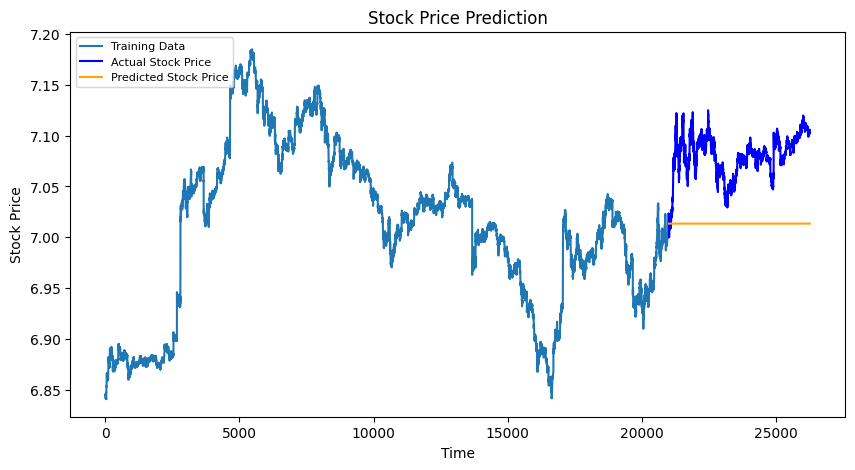

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'data.csv' with your actual dataset file)
df = pd.read_csv('data.csv')

# Assuming 'close' price column is used for GARCH
data = df['close'].values

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit GARCH model on train data
model = arch_model(train, vol='Garch', p=4, q=3)
model_fit = model.fit(disp='off')

# Forecast the length of the test data
forecast = model_fit.forecast(horizon=len(test))
fc_series = forecast.mean.values[-1, :]

# Convert forecast results to a pandas Series
fc_series = pd.Series(fc_series, index=np.arange(train_size, train_size + len(test)))

# Plot
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train, label='Training Data')
plt.plot(np.arange(train_size, train_size + len(test)), test, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()
